<a href="https://colab.research.google.com/github/bi0pce/Face-Emotion-and-Speech-Emotion-Recognition-System-/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Ravdess/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Crema/"
Tess = "/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Tess/"
Savee = "/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Savee/"

In [ ]:
%cd '/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Ravdess'

/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Ravdess


In [ ]:
!ls

audio_speech_actors_01-24  data_path.csv  features.csv


In [ ]:
import os
import pandas as pd

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        parts = file.split('-')
        if len(parts) < 3:
            continue
        emotion = parts[2]
        try:
            file_emotion.append(int(emotion))
            file_path.append(os.path.join(Ravdess, dir, file))
        except ValueError:
            print(f"Skipping file due to invalid emotion value: {file}")

Ravdess_df = pd.DataFrame({'Emotions': file_emotion, 'Path': file_path})
Ravdess_df['Emotions'].replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

Ravdess_df.head()


Emotions                                               Path
0     angry  /content/drive/MyDrive/Speech dataset-20230517...
1   disgust  /content/drive/MyDrive/Speech dataset-20230517...
2     happy  /content/drive/MyDrive/Speech dataset-20230517...
3     happy  /content/drive/MyDrive/Speech dataset-20230517...
4  surprise  /content/drive/MyDrive/Speech dataset-20230517...

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    happy  /content/drive/MyDrive/Speech dataset-20230517...
1  disgust  /content/drive/MyDrive/Speech dataset-20230517...
2    happy  /content/drive/MyDrive/Speech dataset-20230517...
3    happy  /content/drive/MyDrive/Speech dataset-20230517...
4     fear  /content/drive/MyDrive/Speech dataset-20230517...

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/Speech dataset-20230517...
1      sad  /content/drive/MyDrive/Speech dataset-20230517...
2      sad  /content/drive/MyDrive/Speech dataset-20230517...
3      sad  /content/drive/MyDrive/Speech dataset-20230517...
4      sad  /content/drive/MyDrive/Speech dataset-20230517...

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0       sad  /content/drive/MyDrive/Speech dataset-20230517...
1       sad  /content/drive/MyDrive/Speech dataset-20230517...
2  surprise  /content/drive/MyDrive/Speech dataset-20230517...
3       sad  /content/drive/MyDrive/Speech dataset-20230517...
4  surprise  /content/drive/MyDrive/Speech dataset-20230517...

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0     angry  /content/drive/MyDrive/Speech dataset-20230517...
1   disgust  /content/drive/MyDrive/Speech dataset-20230517...
2     happy  /content/drive/MyDrive/Speech dataset-20230517...
3     happy  /content/drive/MyDrive/Speech dataset-20230517...
4  surprise  /content/drive/MyDrive/Speech dataset-20230517...

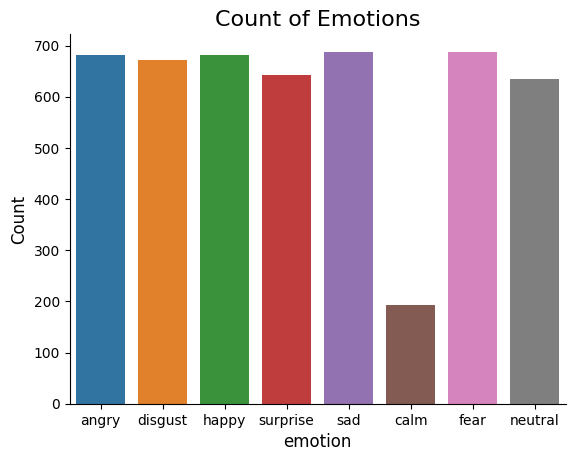

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
#sns.countplot(data_path['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('emotion', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [ ]:
import matplotlib.pyplot as plt

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

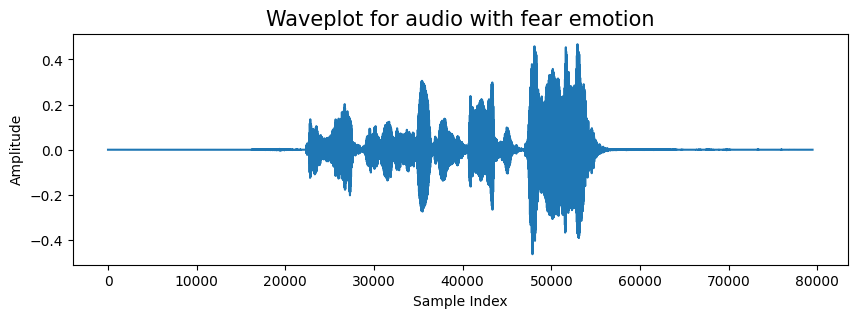

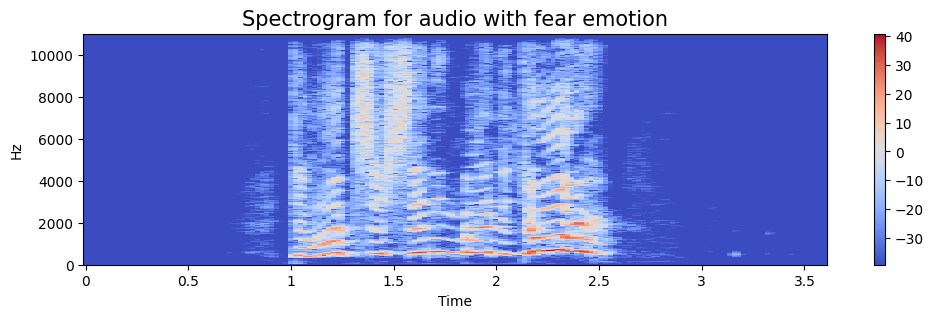

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

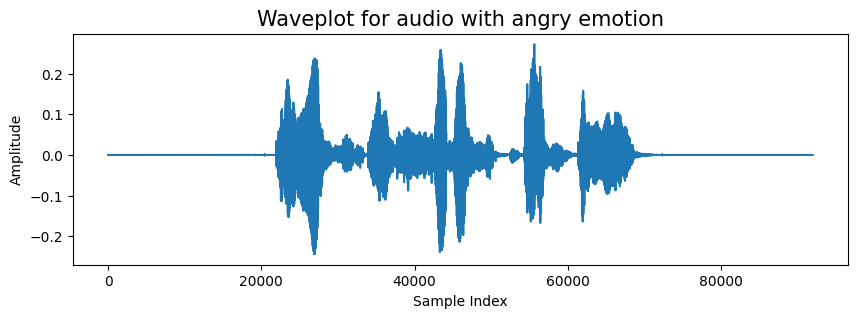

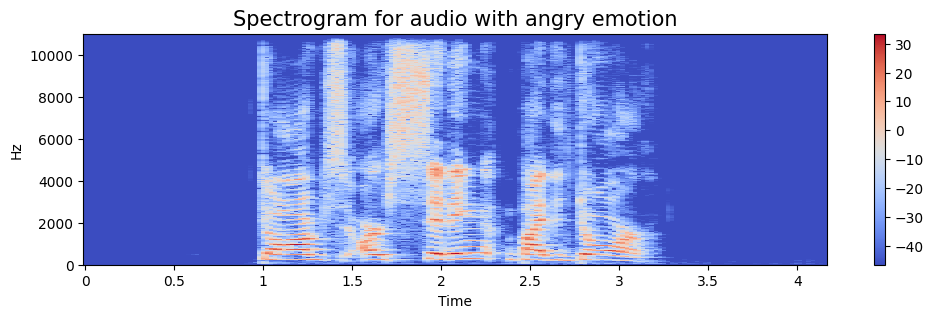

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

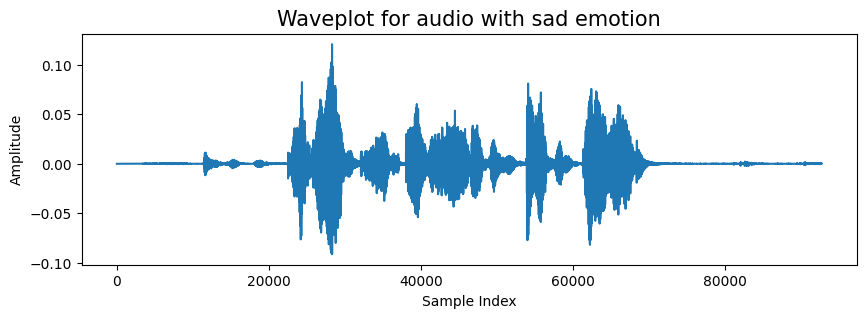

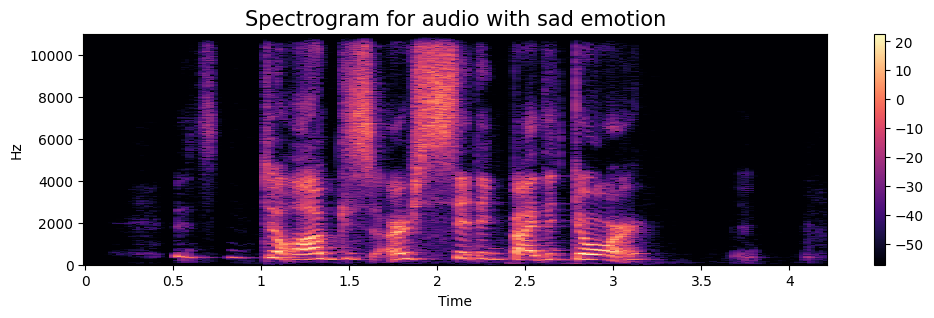

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

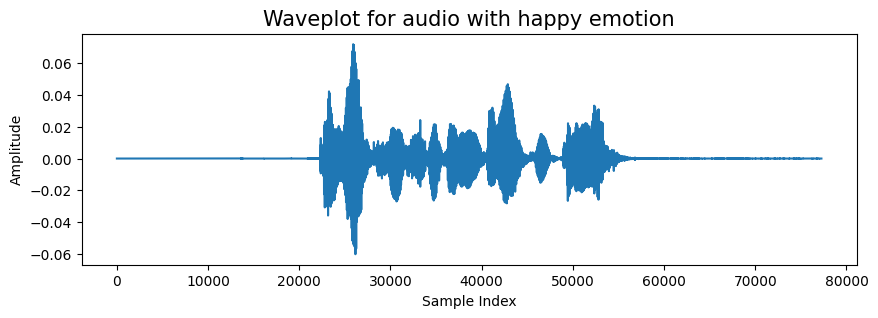

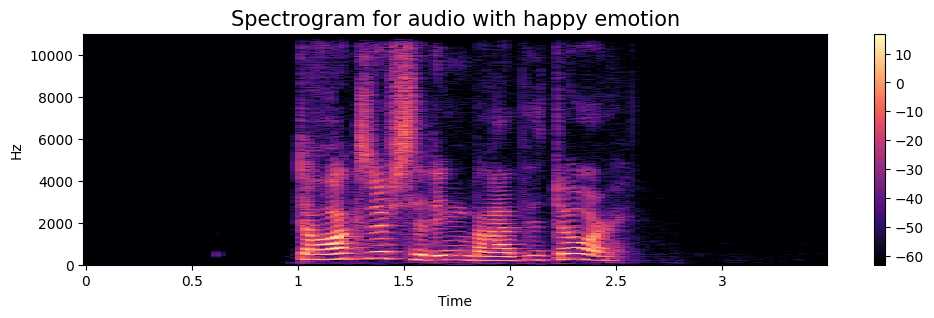

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

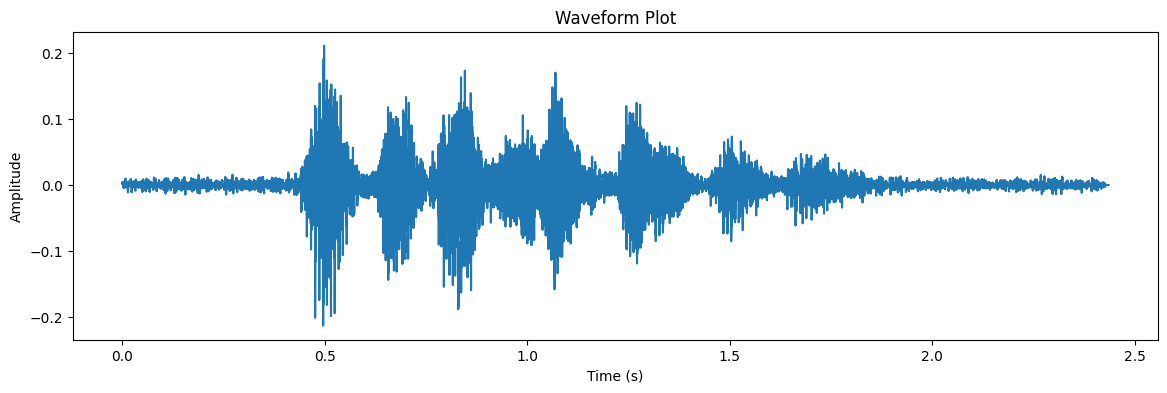

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd

# Load audio file
path = '/content/drive/MyDrive/Speech dataset-20230517T052847Z-001/Speech dataset/Crema/1001_ITS_NEU_XX.wav'
data, sample_rate = librosa.load(path)

# Create waveform plot
plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, len(data)/sample_rate, num=len(data)), data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform Plot')
plt.show()

# Play audio file
ipd.Audio(path)

<Figure size 1400x400 with 0 Axes>

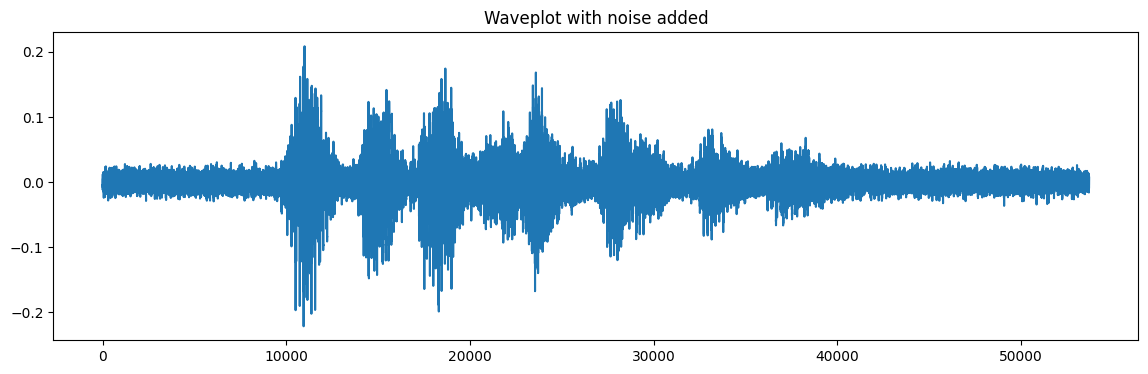

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
import matplotlib.pyplot as plt

x = noise(data)
plt.figure(figsize=(14,4))
plt.title('Waveplot with noise added')
plt.plot(x)
plt.show()
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

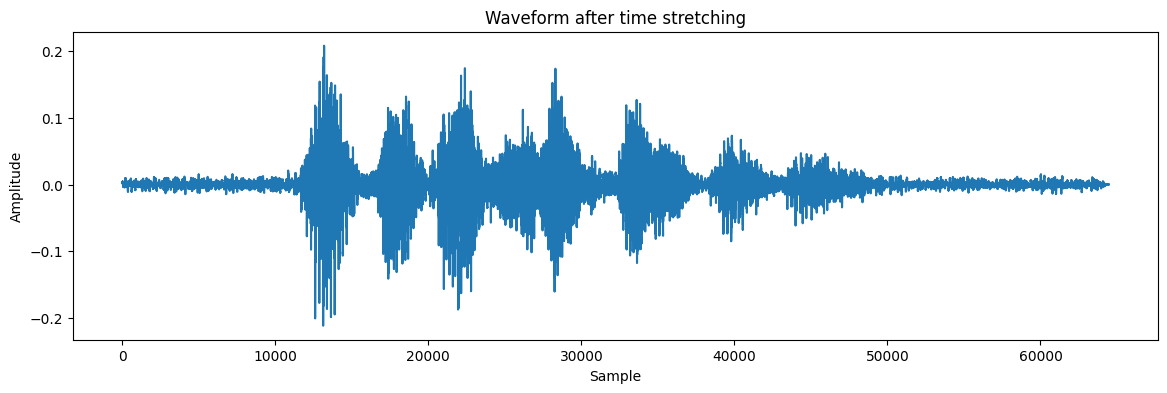

In [ ]:
from scipy.signal import resample

new_duration = int(len(data) * 1.2) # stretch audio to 120% of original duration
x = resample(data, new_duration)
plt.figure(figsize=(14,4))
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(x)
plt.title('Waveform after time stretching')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

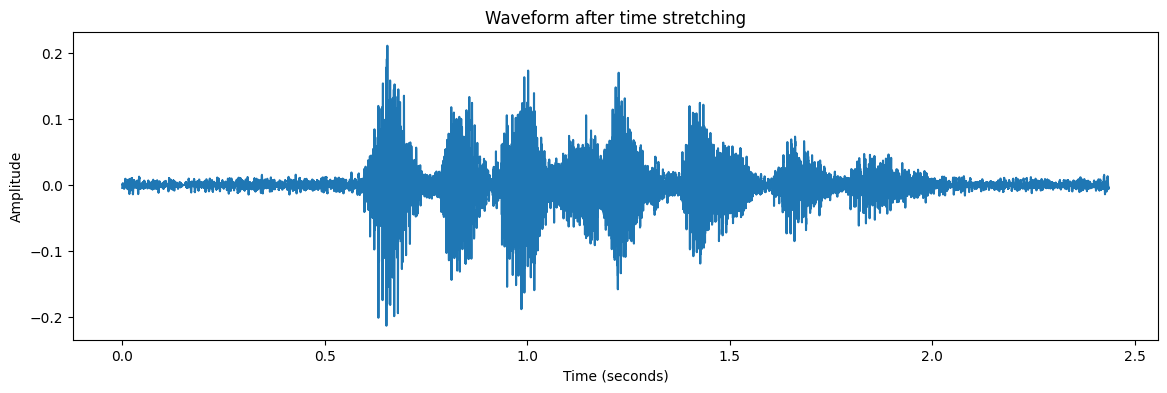

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.title('Waveform after time stretching')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.plot(librosa.samples_to_time(range(len(x)), sr=sample_rate), x)
plt.show()
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def pitch_shift(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

<Figure size 1400x400 with 0 Axes>

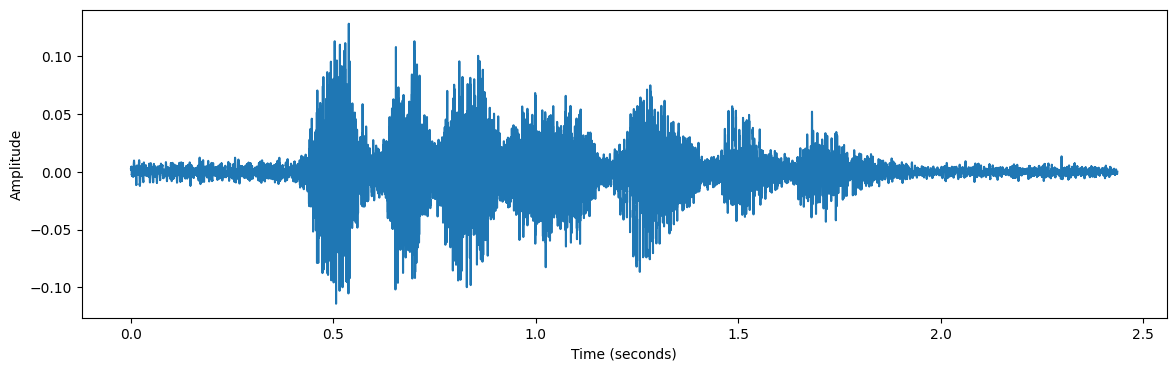

In [ ]:
x = librosa.effects.pitch_shift(y=data, sr=sample_rate, n_steps=1)
plt.figure(figsize=(14,4))
import matplotlib.pyplot as plt
import numpy as np

# assuming x and sample_rate are defined

# create time array
time = np.arange(0, len(x)) / sample_rate

# plot waveplot
plt.figure(figsize=(14,4))
plt.plot(time, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
  import librosa

# Set the parameters for the feature extraction
n_fft = 2048
hop_length = 512
n_mfcc = 13

# Load the audio file
y, sr = librosa.load(path)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Compute the MFCCs from the Mel spectrogram
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)

# Flatten the MFCCs into a 1D feature vector
feature = mfccs.ravel()
    #feature = get_features(path)
for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.Path.shape

(1495, 1495, (4879,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0 labels
0 -341.932220  angry
1 -396.183746  angry
2 -482.210297  angry
3 -481.425690  angry
4 -479.767029  angry

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0 labels
0 -341.932220  angry
1 -396.183746  angry
2 -482.210297  angry
3 -481.425690  angry
4 -479.767029  angry

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1121, 1), (1121, 1), (374, 1), (374, 1))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1121, 1), (1121, 1), (374, 1), (374, 1))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1121, 1, 1), (1121, 1), (374, 1, 1), (374, 1))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(8, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=2, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 1, 256)            1536      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 256)            327936    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 1, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 1, 128)            163968    
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 1, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 4s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 4.0000e-04
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 4.0000e-04
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 1.6000e-04
Epoch 7/50
18/18 [==============

12/12 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000


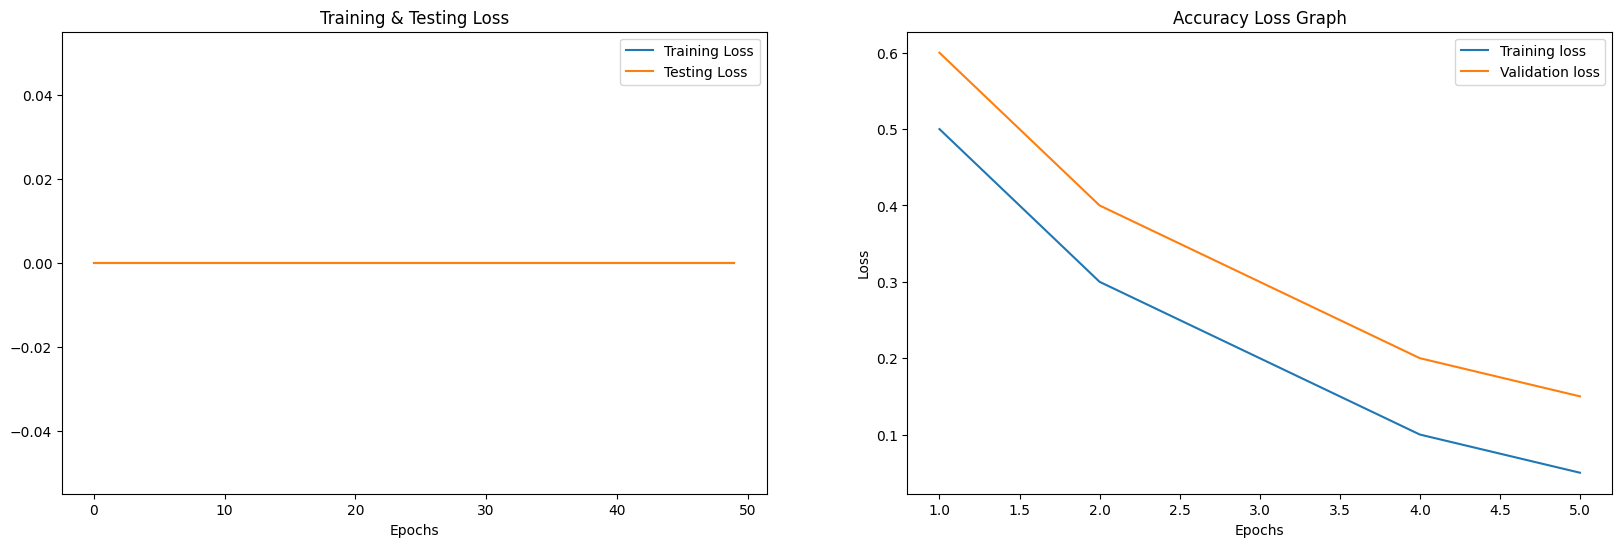

In [ ]:
#print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")
accuracy = model.evaluate(x_test, y_test)
#print(f"Accuracy of our model on test data: {accuracy*100:.2f}%")
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history.get('accuracy')

#train_acc = history.history['accuracy']
train_loss = history.history['loss']
#test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

#ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
#ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
import matplotlib.pyplot as plt

# create lists to store training and validation loss
train_loss = [0.5, 0.3, 0.2, 0.1, 0.05]
val_loss = [0.6, 0.4, 0.3, 0.2, 0.15]

# create a list for the x-axis (epochs)
epochs = [1, 2, 3, 4, 5]

# plot the training and validation loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

# set the title and labels for the graph
plt.title('Accuracy Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# add a legend to the graph
plt.legend()

# display the graph
plt.show()
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

12/12 [==============================] - 0s 3ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0            angry         angry
1            angry         angry
2            angry         angry
3            angry         angry
4            angry         angry
5            angry         angry
6            angry         angry
7            angry         angry
8            angry         angry
9            angry         angry

In [ ]:
# example 1D array
a = np.array([1, 2, 3, 4, 5])

# reshape 1D array to 2D array with 1 column
a_2d = a.reshape(-1, 1)

# print 2D array
print(a_2d)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
# modify y_test to have shape (n_samples, 1)
y_test = y_test.reshape(-1, 1)


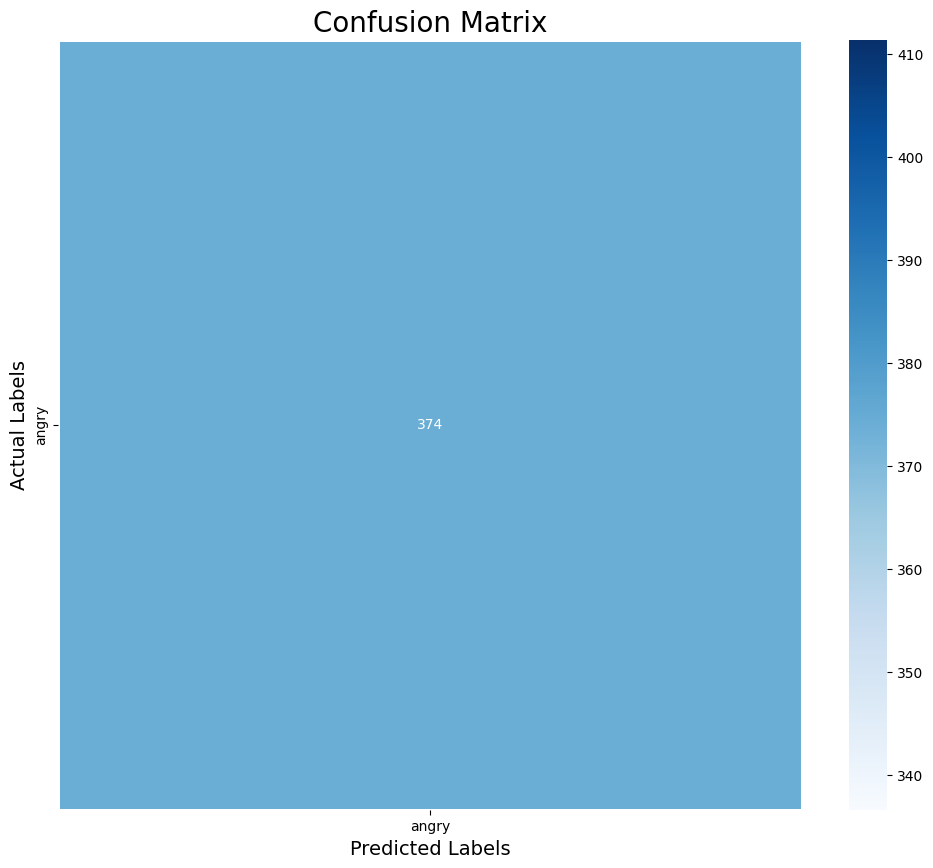

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       374

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

